In [2]:
#Importation des différentes librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
#on utilise les données scalées car la méthode des k-means est sensible aux valeurs extrêmes :
df = pd.read_csv('data_scaled.csv', index_col=0)

# K-means

On cherche à clusteriser les observations afin de déterminer s'il y a des groupes plus touchés par l'hypertension que d'autres. Pour cela, on clusterise d'abord les données sans prendre en compte l'hypertension, puisque c'est la variable que l'on cherche à prédire ; puis on regarde la distribution de cette variable dans chaque groupe. Cela nous permettra de détecter des variables d'intérêt.

In [4]:
# Création d'un nouveau dataframe pour le clustering
prediction = 'high_blood_pressure'
df_cluster = df.drop([prediction], axis=1) #on enlève la variable de prédiction avant de faire le clustering
df_cluster

,asthma,anemia,overweight,blood_transfusion,arthritis,congestive_heart_failure,coronary_heart_failure,angina,heart_attack,stroke,...,income_3,income_4,income_5,income_6,income_8,income_10,income_12,income_13,income_14,income_15
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9217,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9241,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9244,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
#Test pour savoir quel nombre de clusters est le plus optimal 

NB_CLUSTERS = 10 #nombre maximal de clusters qu'on veut tester

for k in range(2, NB_CLUSTERS + 1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_cluster) #kmeans avec k clusters    
    #puis on détermine le coefficient de silhouette associé, qui mesure la pertinence du clustering :
    coef_sil = metrics.silhouette_score(df_cluster, kmeans.labels_, metric='euclidean') 
    print("Nombre de clusters: {}".format(k))
    print('Coefficient de silhouette: {:.3g}'.format(coef_sil))
    print("-" * 100)

Nombre de clusters: 2
Coefficient de silhouette: 0.51
----------------------------------------------------------------------------------------------------
Nombre de clusters: 3
Coefficient de silhouette: 0.383
----------------------------------------------------------------------------------------------------
Nombre de clusters: 4
Coefficient de silhouette: 0.327
----------------------------------------------------------------------------------------------------
Nombre de clusters: 5
Coefficient de silhouette: 0.271
----------------------------------------------------------------------------------------------------
Nombre de clusters: 6
Coefficient de silhouette: 0.226
----------------------------------------------------------------------------------------------------
Nombre de clusters: 7
Coefficient de silhouette: 0.192
----------------------------------------------------------------------------------------------------
Nombre de clusters: 8
Coefficient de silhouette: 0.166
----------

Le coefficient de silhouette permet de quantifier la pertinence de clustering. Il se construit en mesurant pour chaque point sa distance aux centroïdes de chaque cluster, ce qui permet de déterminer si le point est bien classé. Plus le coefficient de silhouette est proche de 1, plus le nombre de clusters choisis pour le clustering est efficace.
Ici le meilleur score correspond à un choix de 2 clusters, on effectue donc un K-means avec deux clusters : 

In [6]:
N_CLUSTERS = 2
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_cluster)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_cluster)

df_cluster['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu
df_cluster[prediction] = df[[prediction]] #on remet la variable de prédiction dans le df

In [7]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_cluster = []
for i in range (N_CLUSTERS ):
     list_cluster.append(df_cluster[df_cluster['cluster'] == i])

In [8]:
list_cluster[0]

,asthma,anemia,overweight,blood_transfusion,arthritis,congestive_heart_failure,coronary_heart_failure,angina,heart_attack,stroke,...,income_5,income_6,income_8,income_10,income_12,income_13,income_14,income_15,cluster,high_blood_pressure
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9217,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9241,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [9]:
list_cluster[1]

,asthma,anemia,overweight,blood_transfusion,arthritis,congestive_heart_failure,coronary_heart_failure,angina,heart_attack,stroke,...,income_5,income_6,income_8,income_10,income_12,income_13,income_14,income_15,cluster,high_blood_pressure
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
52,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
60,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
79,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9182,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9190,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


On peut tout d'abord noter que les deux clusters sont de taille équivalente (respectivement 653 et 638 individus).
On compare ensuite ces deux clusters :

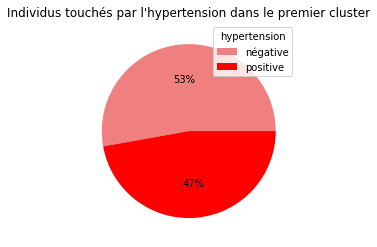

In [10]:
#on regarde la distribution de la variable d'intérêt dans chaque cluster pour voir si cela diffère ou non :
plt.pie(list_cluster[0][prediction].value_counts(normalize=True), autopct='%1.0f%%', labels=['négative', 'positive'],
        colors=['lightcoral', 'red'], labeldistance=None)
plt.title("Individus touchés par l'hypertension dans le premier cluster")
plt.legend(title='hypertension')
plt.show()

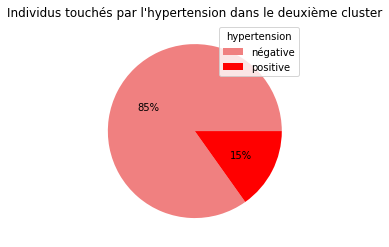

In [11]:
plt.pie(list_cluster[1][prediction].value_counts(normalize=True), autopct='%1.0f%%', labels=['négative', 'positive'],
        colors=['lightcoral', 'red'], labeldistance=None)
plt.title("Individus touchés par l'hypertension dans le deuxième cluster")
plt.legend(title='hypertension')
plt.show()

Les individus du deuxième cluster sont bien plus touchés par l'hypertension (à 47%) que ceux du premier cluster (à 15% seulement). On regarde alors les différences de distribution des variables entre ces deux clusters, en considérant les variables qui sont apparues pertinentes grâce à l'analyse des statistiques descriptives : 

In [12]:
variables = ['creatinine', 'cholesterol', 'blood_lead', 'blood_mercury', 'blood_selenium', 
             'blood_manganese', 'lymphocyte', 'monocyte', 'neutrophils', 'eosinophils', 'basophils', 'hemoglobin', 'hematocrit', 
             'platelet', 'ferritin', 'glycohemoglobin', 'mercury', 'vitamin_c', 'age\xa0']

list_cluster[0][variables].describe()

,creatinine,cholesterol,blood_lead,blood_mercury,blood_selenium,blood_manganese,lymphocyte,monocyte,neutrophils,eosinophils,basophils,hemoglobin,hematocrit,platelet,ferritin,glycohemoglobin,mercury,vitamin_c,age
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,-0.156742,0.140584,0.252726,0.031321,0.064786,-0.149898,-0.066541,0.188674,0.005415,0.041226,0.137358,0.026882,0.042130,-0.192582,0.148748,0.320288,0.049868,0.111454,63.840125
std,0.865500,1.057778,0.859552,0.935114,1.099869,0.906177,1.027898,1.017308,1.015516,0.980313,1.054994,0.958857,0.973459,0.934723,1.237988,1.033884,1.020519,1.111188,8.865796
min,-1.437463,-2.713494,-0.885596,-0.623018,-3.578398,-1.912867,-2.708705,-2.599777,-3.089795,-1.455913,-2.081716,-4.791102,-4.217748,-2.314123,-0.718655,-2.658112,-0.438673,-1.884253,50.000000
25%,-0.823075,-0.587395,-0.272045,-0.499529,-0.590971,-0.781734,-0.782259,-0.520821,-0.669596,-0.614442,-0.578138,-0.572519,-0.543633,-0.780146,-0.379944,-0.241476,-0.438673,-0.694912,56.000000
50%,-0.274945,0.108979,0.052515,-0.265999,-0.033649,-0.274253,-0.126752,0.079766,0.023413,-0.141114,0.023293,0.030135,0.052169,-0.268820,-0.128696,0.316209,-0.438673,0.084015,63.000000
75%,0.321373,0.762215,0.508233,0.154600,0.562595,0.307279,0.577418,0.818950,0.716421,0.384805,0.624724,0.632790,0.697622,0.322401,0.325210,0.687999,0.133118,0.822115,70.000000
max,5.381039,5.840202,7.686345,6.444017,9.124933,5.799218,3.348295,5.485050,3.488456,7.379536,7.541184,2.909486,3.329083,4.684648,23.867875,11.284018,6.931073,3.900221,80.000000


In [13]:
list_cluster[1][variables].describe()

,creatinine,cholesterol,blood_lead,blood_mercury,blood_selenium,blood_manganese,lymphocyte,monocyte,neutrophils,eosinophils,basophils,hemoglobin,hematocrit,platelet,ferritin,glycohemoglobin,mercury,vitamin_c,age
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,0.153142,-0.137355,-0.246921,-0.030602,-0.063298,0.146455,0.065012,-0.184340,-0.005291,-0.040279,-0.134203,-0.026264,-0.041162,0.188158,-0.145331,-0.312931,-0.048723,-0.108894,34.882083
std,1.095754,0.921235,1.065208,1.060114,0.888853,1.065048,0.969138,0.948730,0.986133,1.018759,0.925286,1.039427,1.025088,1.026989,0.663251,0.858649,0.978648,0.865851,8.455941
min,-1.413370,-2.121884,-1.001193,-0.623018,-2.437429,-1.885693,-2.731605,-2.692175,-4.497136,-1.403321,-2.081716,-4.188448,-3.919847,-2.202270,-0.717755,-2.658112,-0.438673,-1.847724,20.000000
25%,-0.654420,-0.790761,-0.663295,-0.549658,-0.659790,-0.597628,-0.613373,-0.844214,-0.658934,-0.719626,-0.878854,-0.706443,-0.742234,-0.492525,-0.578099,-0.799162,-0.438673,-0.741111,28.000000
50%,-0.040032,-0.273102,-0.494346,-0.368703,-0.138946,-0.016096,-0.006528,-0.243627,0.076721,-0.351482,-0.277422,0.030135,0.002519,0.050759,-0.381840,-0.427371,-0.438673,-0.113671,35.000000
75%,0.755059,0.491061,-0.129772,-0.016574,0.440563,0.592610,0.669017,0.310761,0.663113,0.332213,0.324009,0.699752,0.672797,0.785790,0.060925,0.130314,-0.057479,0.462197,42.000000
max,5.079868,3.966770,18.525760,12.376414,5.447059,6.032918,3.783391,7.333010,3.221914,6.695841,6.639037,2.909486,3.229782,6.713972,4.384290,10.912228,9.472364,3.470468,49.000000


On retrouve bien la disparité que l'on avait observée précédemment : dans le deuxième cluster, celui le plus touché par l'hypertension, les individus sont en moyenne plus âgés (âge moyen et médian de 63 ans, contre 35 dans le premier cluster). Ils ont par ailleurs une composition sanguine très différente : les taux de cholestérol, de plomb, de mercure, de sélénium, de manganèse, de lymphocyte, de monocyte, de neutrophiles, de ferritine, d'éosinophiles et de basophiles par litre de sang sont en moyenne plus élevés que dans le premier cluster, moins touché par l'hypertension. Au contraire, les personnes du deuxième cluster ont en moyenne moins d'hémoglobine et de plaquettes que les individus plutôt épargnés par l'hypertension.

(NB : dans ce cas-là, comme on a utilisé les données scalées pour réaliser le clustering, on obtient parfois des valeurs négatives pour les variables sur la composition sanguine, donc on ne peut pas donner une interprétation en termes de teneur en molécule par litre de sang. Mais on peut toujours comparer ces valeurs entre elles)

On peut donc conclure à l'intérêt de ces différentes variables pour prédire le risque d'hypertension artérielle.